In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

import datetime as dt
from sqlalchemy import create_engine

## Extract Household_Types_CSV into DataFrame¶

In [2]:
csv_file = "2- CSV/Original_CSV/VIF2019_Pop_Hholds_Dws_ASGS_2036_households_types.csv"
df = pd.read_csv(csv_file)
df.head()

,Victoria in Future 2019 (VIF2019) Population and Household Projections,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,Jun-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Contact: David Sykes (DELWP) 03 8683 0936 | da...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Households by household type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Transformation of dataframe

In [3]:
#Identifying the row containing the column names - row index 8:
df.iloc[8]

Victoria in Future 2019 (VIF2019) Population and Household Projections                             GCCSA
Unnamed: 1                                                                                           SA4
Unnamed: 2                                                                                           SA3
Unnamed: 3                                                                                           SA2
Unnamed: 4                                                                                     Area Type
Unnamed: 5                                                                                     Area Name
Unnamed: 6                                                                   Couple family with children
Unnamed: 7                                                                Couple family without children
Unnamed: 8                                                                             One-parent family
Unnamed: 9                                             

In [4]:
#set row 8 as the new columns' head
df.columns = df.iloc[8]
df.head()

8,GCCSA,SA4,SA3,SA2,Area Type,Area Name,Couple family with children,Couple family without children,One-parent family,Other family,...,Lone person,All Household Types,NaN,Couple family with children,Couple family without children,One-parent family,Other family,Group household,Lone person,All Household Types
0,Jun-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Contact: David Sykes (DELWP) 03 8683 0936 | da...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Households by household type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Drop unnecessary rows
new_df = df.iloc[10:472,:]
#Reser the index:
df = new_df.reset_index(drop=True)
df

8,GCCSA,SA4,SA3,SA2,Area Type,Area Name,Couple family with children,Couple family without children,One-parent family,Other family,...,Lone person,All Household Types,NaN,Couple family with children,Couple family without children,One-parent family,Other family,Group household,Lone person,All Household Types
0,2RVIC,201,20101,201011001,SA2,Alfredton,"1,657","1,121",508,30,...,"1,756","8,805",NaN,"3,935","2,725","1,175",70,324,"2,102","10,332"
1,2RVIC,201,20101,201011002,SA2,Ballarat,"1,270","1,377",532,46,...,"2,068","5,762",NaN,"1,226","1,640",545,46,305,"2,183","5,944"
2,2RVIC,201,20101,201011003,SA2,Ballarat - North,"2,653","2,585","1,107",90,...,"3,954","11,936",NaN,"2,959","3,365","1,309",102,563,"4,230","12,527"
3,2RVIC,201,20101,201011004,SA2,Ballarat - South,"2,310","2,488","1,587",152,...,"4,815","13,354",NaN,"2,817","3,168","1,986",177,797,"5,124","14,068"
4,2RVIC,201,20101,201011005,SA2,Buninyong,988,797,227,14,...,717,"3,394",NaN,"1,239","1,173",295,18,121,805,"3,651"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,2RVIC,217,21703,217031476,SA2,Otway,326,559,154,2,...,679,"1,819",NaN,315,601,175,3,55,686,"1,834"
458,2RVIC,217,21704,217041477,SA2,Moyne - East,848,843,226,24,...,817,"2,989",NaN,900,985,263,26,57,863,"3,094"
459,2RVIC,217,21704,217041478,SA2,Moyne - West,"1,173","1,299",328,31,...,"1,308","4,725",NaN,"1,379","1,645",411,42,112,"1,410","5,001"
460,2RVIC,217,21704,217041479,SA2,Warrnambool - North,"2,518","2,400","1,070",83,...,"3,121","10,731",NaN,"3,054","3,134","1,303",96,387,"3,351","11,326"


## Description of the original dataset shown above:
This dataset has 45 columns. 
The first 6 columns are about the areas: (GCCSA	SA4	SA3	SA2	Area Type	Area Name)
The next 7 columns are about the count of household types at 30-06-2016:
- Couple family with children	
- Couple family without children	
- One-parent family	
- Other family	
- Group household	
- Lone person
- All Household Types

- The next 7 columns are the count of household types at 30-06-2021
- The next 7 columns are the count of household types at 30-06-2026
- The next 7 columns are the count of household types at 30-06-2031
- The next 7 columns are the count of household types at 30-06-2036

Therefore we are going to breakdown this dataset into five dataframes:
- One for the household types data in 2016
- One for the household types data in 2021
- One for the household types data in 2026
- One for the household types data in 2031
- One for the household types data in 2036

## Preparing dataframe for the year 2016 

In [6]:
#Select columns for the 2016 data
df_2016 = df.iloc[:,[3,5,6,7,8,9,10,11,12]]
df_2016.head()

8,SA2,Area Name,Couple family with children,Couple family without children,One-parent family,Other family,Group household,Lone person,All Household Types
0,201011001,Alfredton,"1,657","1,121",508,30,142,813,"4,272"
1,201011002,Ballarat,"1,270","1,377",532,46,335,"1,782","5,341"
2,201011003,Ballarat - North,"2,653","2,585","1,107",90,506,"3,117","10,058"
3,201011004,Ballarat - South,"2,310","2,488","1,587",152,701,"3,874","11,111"
4,201011005,Buninyong,988,797,227,14,103,477,"2,606"


In [7]:
#Add a column year with the value 2016
df_2016.insert(0, 'Year', '2016-06-30')
#Convert the column Year to datetime
df_2016['Year'] = pd.to_datetime(df_2016.Year)
#Checking the types of data in the dataframe
df_2016.dtypes

C:\Users\ianli\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


8
Year                              datetime64[ns]
SA2                                       object
Area Name                                 object
Couple family with children               object
Couple family without children            object
One-parent family                         object
Other family                              object
Group household                           object
Lone person                               object
All Household Types                       object
dtype: object

## Preparing CSV for the year 2021

In [8]:
#Select columns for the 2021 data
df_2021 = df.iloc[:,[3,5,14,15,16,17,18,19,20]]
df_2021.head()

8,SA2,Area Name,Couple family with children,Couple family without children,One-parent family,Other family,Group household,Lone person,All Household Types
0,201011001,Alfredton,"2,193","1,531",649,42,191,"1,097","5,704"
1,201011002,Ballarat,"1,233","1,439",524,45,314,"1,835","5,389"
2,201011003,Ballarat - North,"2,762","2,861","1,153",94,516,"3,426","10,812"
3,201011004,Ballarat - South,"2,455","2,722","1,683",159,723,"4,222","11,964"
4,201011005,Buninyong,"1,046",914,245,15,102,557,"2,879"


In [9]:
#Add a column year with the value 2021
df_2021.insert(0, 'Year', '2021-06-30')
#Convert the column Year to datetime
df_2021['Year'] = pd.to_datetime(df_2021.Year)
#Checking the types of data in the dataframe
df_2021.dtypes

C:\Users\ianli\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


8
Year                              datetime64[ns]
SA2                                       object
Area Name                                 object
Couple family with children               object
Couple family without children            object
One-parent family                         object
Other family                              object
Group household                           object
Lone person                               object
All Household Types                       object
dtype: object

## Preparing CSV for the year 2026¶

In [10]:
#Select columns for the 2026 data
df_2026 = df.iloc[:,[3,5,22,23,24,25,26,27,28]]
df_2026.head()

8,SA2,Area Name,Couple family with children,Couple family without children,One-parent family,Other family,Group household,Lone person,All Household Types
0,201011001,Alfredton,"2,769","1,943",813,52,238,"1,417","7,232"
1,201011002,Ballarat,"1,229","1,519",527,45,305,"1,956","5,580"
2,201011003,Ballarat - North,"2,832","3,054","1,192",95,516,"3,686","11,375"
3,201011004,Ballarat - South,"2,594","2,882","1,771",161,727,"4,522","12,657"
4,201011005,Buninyong,"1,113","1,011",254,16,110,631,"3,134"


In [11]:
#Add a column year with the value 2026
df_2026.insert(0, 'Year', '2026-06-30')
#Convert the column Year to datetime
df_2026['Year'] = pd.to_datetime(df_2026.Year)
#Checking the types of data in the dataframe
df_2026.dtypes

C:\Users\ianli\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


8
Year                              datetime64[ns]
SA2                                       object
Area Name                                 object
Couple family with children               object
Couple family without children            object
One-parent family                         object
Other family                              object
Group household                           object
Lone person                               object
All Household Types                       object
dtype: object

## Preparing CSV for the year 2031¶

In [12]:
#Select columns for the 2031 data
df_2031 = df.iloc[:,[3,5,30,31,32,33,34,35,36]]
df_2031.head()

8,SA2,Area Name,Couple family with children,Couple family without children,One-parent family,Other family,Group household,Lone person,All Household Types
0,201011001,Alfredton,"3,364","2,343",989,63,290,"1,756","8,805"
1,201011002,Ballarat,"1,225","1,588",533,44,304,"2,068","5,762"
2,201011003,Ballarat - North,"2,895","3,212","1,240",99,535,"3,954","11,936"
3,201011004,Ballarat - South,"2,720","3,023","1,870",169,757,"4,815","13,354"
4,201011005,Buninyong,"1,167","1,097",274,18,121,717,"3,394"


In [13]:
#Add a column year with the value 2031
df_2031.insert(0, 'Year', '2031-06-30')
#Convert the column Year to datetime
df_2031['Year'] = pd.to_datetime(df_2031.Year)
df_2031.dtypes

C:\Users\ianli\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


8
Year                              datetime64[ns]
SA2                                       object
Area Name                                 object
Couple family with children               object
Couple family without children            object
One-parent family                         object
Other family                              object
Group household                           object
Lone person                               object
All Household Types                       object
dtype: object

## Preparing CSV for the year 2036

In [14]:
#Select columns for the 2036 data
df_2036 = df.iloc[:,[3,5,38,39,40,41,42,43,44]]
df_2036.head()

8,SA2,Area Name,Couple family with children,Couple family without children,One-parent family,Other family,Group household,Lone person,All Household Types
0,201011001,Alfredton,"3,935","2,725","1,175",70,324,"2,102","10,332"
1,201011002,Ballarat,"1,226","1,640",545,46,305,"2,183","5,944"
2,201011003,Ballarat - North,"2,959","3,365","1,309",102,563,"4,230","12,527"
3,201011004,Ballarat - South,"2,817","3,168","1,986",177,797,"5,124","14,068"
4,201011005,Buninyong,"1,239","1,173",295,18,121,805,"3,651"


In [15]:
#Add a column year with the value 2036
df_2036.insert(0, 'Year', '2036-06-30')
#Convert the column Year to datetime
df_2036['Year'] = pd.to_datetime(df_2036.Year)
df_2036.dtypes

C:\Users\ianli\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


8
Year                              datetime64[ns]
SA2                                       object
Area Name                                 object
Couple family with children               object
Couple family without children            object
One-parent family                         object
Other family                              object
Group household                           object
Lone person                               object
All Household Types                       object
dtype: object

## Creating a master file by concatenating the 5 dataframes together

In [16]:
#Concatenate the five dataframes into one called "master"
frames = [df_2016, df_2021, df_2026, df_2031, df_2036]
master = pd.concat(frames)

In [17]:
#Rename some columns:
master = master.rename(columns={"Year": "Date",
                                "SA2": "SA2 code",
                                "Area Name": "SA2 name"})
master.head()

8,Date,SA2 code,SA2 name,Couple family with children,Couple family without children,One-parent family,Other family,Group household,Lone person,All Household Types
0,2016-06-30,201011001,Alfredton,"1,657","1,121",508,30,142,813,"4,272"
1,2016-06-30,201011002,Ballarat,"1,270","1,377",532,46,335,"1,782","5,341"
2,2016-06-30,201011003,Ballarat - North,"2,653","2,585","1,107",90,506,"3,117","10,058"
3,2016-06-30,201011004,Ballarat - South,"2,310","2,488","1,587",152,701,"3,874","11,111"
4,2016-06-30,201011005,Buninyong,988,797,227,14,103,477,"2,606"


In [18]:
master.count()

8
Date                              2310
SA2 code                          2310
SA2 name                          2310
Couple family with children       2310
Couple family without children    2310
One-parent family                 2310
Other family                      2310
Group household                   2310
Lone person                       2310
All Household Types               2310
dtype: int64

Our master file contains 2310 rows - 5 times x 462 SA2 areas

## Exploratory analysis

In [19]:
#Checking the type of data
master.dtypes

8
Date                              datetime64[ns]
SA2 code                                  object
SA2 name                                  object
Couple family with children               object
Couple family without children            object
One-parent family                         object
Other family                              object
Group household                           object
Lone person                               object
All Household Types                       object
dtype: object

In [20]:
#Converting strings into integer for the relevant columns:
#As part of the household data contains commas (e.g. 1,675), we have to remove the commas for all those numbers.
master['Couple family with children'] = master['Couple family with children'].str.replace(',','')
#Then we convert the data as integer
master['Couple family with children'] = master['Couple family with children'].astype(int)

#Same process for the other relevant columns:
master['Couple family without children'] = master['Couple family without children'].str.replace(',','')
master['Couple family without children'] = master['Couple family without children'].astype(int)
master['One-parent family'] = master['One-parent family'].str.replace(',','')
master['One-parent family'] = master['One-parent family'].astype(int)
master['Other family'] = master['Other family'].str.replace(',','')
master['Other family'] = master['Other family'].astype(int)
master['Group household'] = master['Group household'].str.replace(',','')
master['Group household'] = master['Group household'].astype(int)
master['Lone person'] = master['Lone person'].str.replace(',','')
master['Lone person'] = master['Lone person'].astype(int)
master['All Household Types'] = master['All Household Types'].str.replace(',','')
master['All Household Types'] = master['All Household Types'].astype(int)
master.head()

8,Date,SA2 code,SA2 name,Couple family with children,Couple family without children,One-parent family,Other family,Group household,Lone person,All Household Types
0,2016-06-30,201011001,Alfredton,1657,1121,508,30,142,813,4272
1,2016-06-30,201011002,Ballarat,1270,1377,532,46,335,1782,5341
2,2016-06-30,201011003,Ballarat - North,2653,2585,1107,90,506,3117,10058
3,2016-06-30,201011004,Ballarat - South,2310,2488,1587,152,701,3874,11111
4,2016-06-30,201011005,Buninyong,988,797,227,14,103,477,2606


In [21]:
master.dtypes

8
Date                              datetime64[ns]
SA2 code                                  object
SA2 name                                  object
Couple family with children                int32
Couple family without children             int32
One-parent family                          int32
Other family                               int32
Group household                            int32
Lone person                                int32
All Household Types                        int32
dtype: object

In [22]:
#Drop Null values
master = master.dropna(how="any")
master.count()

8
Date                              2310
SA2 code                          2310
SA2 name                          2310
Couple family with children       2310
Couple family without children    2310
One-parent family                 2310
Other family                      2310
Group household                   2310
Lone person                       2310
All Household Types               2310
dtype: int64

There isn't any row with NULL value.

In [23]:
#Drop duplicates:
master = master.drop_duplicates(subset=['Date', 'SA2 code','All Household Types'])
master.count()

8
Date                              2310
SA2 code                          2310
SA2 name                          2310
Couple family with children       2310
Couple family without children    2310
One-parent family                 2310
Other family                      2310
Group household                   2310
Lone person                       2310
All Household Types               2310
dtype: int64

There aren't any duplicates that has been dropped.

# Looking at the min and max values in household counts 

In [24]:
#Analyse the data with describe
master.describe()

8,Couple family with children,Couple family without children,One-parent family,Other family,Group household,Lone person,All Household Types
count,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000
mean,2035.374459,1664.559307,668.700433,80.152381,288.297403,1625.181385,6362.269697
std,1551.779256,1039.226458,493.584515,93.592147,507.910983,1325.427265,4213.246267
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,998.750000,970.000000,301.500000,24.000000,71.250000,763.000000,3455.000000
50%,1777.000000,1506.000000,576.000000,61.000000,153.000000,1318.500000,5721.000000
75%,2738.500000,2130.000000,908.000000,104.750000,310.750000,2112.000000,8348.000000
max,18578.000000,9860.000000,4606.000000,1443.000000,8028.000000,16901.000000,41588.000000


The min data is at 0 across all columns. Is there a row to remove or are there areas with no housoeholds? 
Therefore we are going to look for suburbs with 0 households.

In [25]:
#As the minimum value is 0, we are sorting the data in ascending order to see what areas are at 0:

#Grouping in SA2 code, SA2 name:
SA2group = master.groupby(["SA2 code","SA2 name"])
#Calculation the sum of total Household Types for each area (2016-2021-2026-2031-2036)
SA2group_df = pd.DataFrame(SA2group["All Household Types"].sum())
#Sorting the data:
sort_master = SA2group_df.sort_values(by=["All Household Types"])
sort_master.head(10)

,,All Household Types
SA2 code,SA2 name,
205031092,Wilsons Promontory,0
205021083,Lake King,0
205021080,Alps - East,0
210011227,Essendon Airport,0
205051099,Alps - West,0
208031192,Moorabbin Airport,0
206041127,West Melbourne,2
208031184,Braeside,55
205031088,French Island,234


We can see some SA2 areas have no household in these areas. But it makes sense:
- Wilsons Promontory, Lake King, Alps East, Alps-West are National Parks
- Essendon Airport and Moorrabin Airport are places where people work and don't live.
- West Melbourne counts only 2 but it is mostly as industrial suburb with the port.
Therefore we will keep those SA2 areas as they remain important if we want to map the Household Types in Victoria and understand where the population live.

## Comparing count of Households in 2016 vs projections in 2036

In [26]:
#Total Household count per suburb in 2016
df_2016 = master.loc[master["Date"] == "2016-06-30", ["SA2 code","SA2 name","Date","All Household Types"]]
df_2016.head()

8,SA2 code,SA2 name,Date,All Household Types
0,201011001,Alfredton,2016-06-30,4272
1,201011002,Ballarat,2016-06-30,5341
2,201011003,Ballarat - North,2016-06-30,10058
3,201011004,Ballarat - South,2016-06-30,11111
4,201011005,Buninyong,2016-06-30,2606


In [27]:
#Total Household count per suburb in 2036
df_2036 = master.loc[master["Date"] == "2036-06-30", ["SA2 code","SA2 name","Date","All Household Types"]]
df_2036.head()

8,SA2 code,SA2 name,Date,All Household Types
0,201011001,Alfredton,2036-06-30,10332
1,201011002,Ballarat,2036-06-30,5944
2,201011003,Ballarat - North,2036-06-30,12527
3,201011004,Ballarat - South,2036-06-30,14068
4,201011005,Buninyong,2036-06-30,3651


## Looking at the correlation between count of households in 2016 vs 2036 to check if the data is relevant.

In [28]:
# Calculate the linear regression model the count of household types in 2016 and 2036:
#Linear regression model:
x_values = df_2016["All Household Types"]
y_values = df_2036["All Household Types"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression equation is : {line_eq}")

The linear regression equation is : y = 1.49x + -221.95


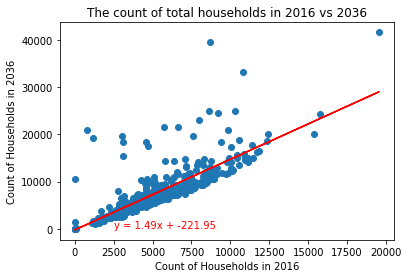

In [29]:
#Looking at the correlation between 2016 data and 2036 data:
x_axis = df_2016["All Household Types"]
y_axis = df_2036["All Household Types"]
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(2500,50),fontsize=10,color="red")
plt.xlabel("Count of Households in 2016")
plt.ylabel("Count of Households in 2036")
plt.title("The count of total households in 2016 vs 2036")
plt.show()

The slope shows that most suburbs are expected to grow by 1.5 over 20 years. 
However we can see there are a few suburbs with a much higher growth rate and some going from near 0 household to more than 10000 in 2036.
We are going to search for these suburbs to see if the data is relevant.

## Identifying the suburbs that have the highest percentage growth

In [30]:
#Merging the two dataframes df_2016 and df_2036:
df_16_36 = pd.merge(df_2016, df_2036, on= "SA2 code", how='inner', suffixes= ["_2016","_2036"])
df_16_36.head()

8,SA2 code,SA2 name_2016,Date_2016,All Household Types_2016,SA2 name_2036,Date_2036,All Household Types_2036
0,201011001,Alfredton,2016-06-30,4272,Alfredton,2036-06-30,10332
1,201011002,Ballarat,2016-06-30,5341,Ballarat,2036-06-30,5944
2,201011003,Ballarat - North,2016-06-30,10058,Ballarat - North,2036-06-30,12527
3,201011004,Ballarat - South,2016-06-30,11111,Ballarat - South,2036-06-30,14068
4,201011005,Buninyong,2016-06-30,2606,Buninyong,2036-06-30,3651


In [31]:
#Removing unnecessary columns:
df_16_36 = df_16_36[["SA2 code","SA2 name_2016","All Household Types_2016","All Household Types_2036"]]
df_16_36.rename(columns={'SA2 name_2016': 'SA2 name'})
df_16_36

8,SA2 code,SA2 name_2016,All Household Types_2016,All Household Types_2036
0,201011001,Alfredton,4272,10332
1,201011002,Ballarat,5341,5944
2,201011003,Ballarat - North,10058,12527
3,201011004,Ballarat - South,11111,14068
4,201011005,Buninyong,2606,3651
...,...,...,...,...
457,217031476,Otway,1721,1834
458,217041477,Moyne - East,2686,3094
459,217041478,Moyne - West,3949,5001
460,217041479,Warrnambool - North,8806,11326


In [32]:
#Calculating percentage growth:
df_16_36["Household Growth"] = (df_16_36["All Household Types_2036"]/df_16_36["All Household Types_2016"]).round(decimals=2)
df_16_36.head()

8,SA2 code,SA2 name_2016,All Household Types_2016,All Household Types_2036,Household Growth
0,201011001,Alfredton,4272,10332,2.42
1,201011002,Ballarat,5341,5944,1.11
2,201011003,Ballarat - North,10058,12527,1.25
3,201011004,Ballarat - South,11111,14068,1.27
4,201011005,Buninyong,2606,3651,1.40


In [33]:
#Searching for the suburbs with highest projections of growth:
sort = df_16_36.sort_values(by=["Household Growth"], ascending = False)
sort.head(8)

8,SA2 code,SA2 name_2016,All Household Types_2016,All Household Types_2036,Household Growth
130,206051131,Port Melbourne Industrial,13,10534,810.31
119,206041120,Flemington Racecourse,44,1476,33.55
380,213041359,Rockbank - Mount Cottrell,797,20989,26.34
264,210051445,Mickleham - Yuroke,1182,19249,16.29
233,209041437,Wollert,3024,19740,6.53
323,212031303,Cranbourne South,3067,18376,5.99
225,209041225,Whittlesea,3092,15392,4.98
321,212031301,Cranbourne East,8661,39453,4.56


Here are top 8 suburbs with the highest growth projections in households planned by Planning Victoria.
We can therefore see Port Melbourne Industrial, Flemington Racecourse, Rockbank - Mount Cottrell will become new suburbs with households over the next 20 years.

## Saving Master file to csv to be loaded in database

In [34]:
#Save Master file as CSV to be loaded in our database:
master.to_csv('2- CSV/master_households_types.csv')
master.dtypes

8
Date                              datetime64[ns]
SA2 code                                  object
SA2 name                                  object
Couple family with children                int32
Couple family without children             int32
One-parent family                          int32
Other family                               int32
Group household                            int32
Lone person                                int32
All Household Types                        int32
dtype: object

## Load into the database

To work with the SQL database the columns names need to be low case and without any space, therefore we are renaming columns accordingly.

In [35]:
# Rename columns names to load dataframe to PostgresSQL
master = master.rename(columns={"SA2 code": "sa2_code",
                                "SA2 name": "sa2_name",
                                "Date": "stat_date",
                                "Couple family with children": "couple_family_with_children",
                                "Couple family without children": "couple_family_without_children",
                                "One-parent family": "one_parent_family",
                                "Other family": "other_family",
                                "Group household": "group_household",
                                "Lone person": "lone_person",
                                "All Household Types": "all_household_types",
                               })
master.head()

8,stat_date,sa2_code,sa2_name,couple_family_with_children,couple_family_without_children,one_parent_family,other_family,group_household,lone_person,all_household_types
0,2016-06-30,201011001,Alfredton,1657,1121,508,30,142,813,4272
1,2016-06-30,201011002,Ballarat,1270,1377,532,46,335,1782,5341
2,2016-06-30,201011003,Ballarat - North,2653,2585,1107,90,506,3117,10058
3,2016-06-30,201011004,Ballarat - South,2310,2488,1587,152,701,3874,11111
4,2016-06-30,201011005,Buninyong,988,797,227,14,103,477,2606


In [38]:
# Connect to PostgresSQL database 
population_connection_string = "postgres:<password>@localhost:5432/population_db"
engine = create_engine(f'postgresql://{population_connection_string}')

In [39]:
# Confirm table names
engine.table_names()

['population_growth', 'households_type']

In [40]:
# Load master dataframe to database using pandas
master.to_sql(name='households_type', con=engine, if_exists='append', index=False)

In [41]:
# Query database to check if loading is successful
pd.read_sql_query('select * from households_type', con=engine).head()

,id,stat_date,sa2_code,sa2_name,couple_family_with_children,couple_family_without_children,one_parent_family,other_family,group_household,lone_person,all_household_types
0,1,2016-06-30,201011001,Alfredton,1657,1121,508,30,142,813,4272
1,2,2016-06-30,201011002,Ballarat,1270,1377,532,46,335,1782,5341
2,3,2016-06-30,201011003,Ballarat - North,2653,2585,1107,90,506,3117,10058
3,4,2016-06-30,201011004,Ballarat - South,2310,2488,1587,152,701,3874,11111
4,5,2016-06-30,201011005,Buninyong,988,797,227,14,103,477,2606


In [42]:
# Query database to find out the couple_family_with_children growth for sa2_code 210051445
pd.read_sql_query("select stat_date, sa2_code, sa2_name, couple_family_with_children from households_type where sa2_code = '210051445';", con=engine).head()

,stat_date,sa2_code,sa2_name,couple_family_with_children
0,2016-06-30,210051445,Mickleham - Yuroke,601
1,2021-06-30,210051445,Mickleham - Yuroke,3018
2,2026-06-30,210051445,Mickleham - Yuroke,5530
3,2031-06-30,210051445,Mickleham - Yuroke,7737
4,2036-06-30,210051445,Mickleham - Yuroke,9486
